# Predicting housing prices

### Data set: Ames housing dataset
### Approach: Ensemble of decision trees (Random forest)

Baseline notebook with random forests, no significant feature engineering or analysis


### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [2]:

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [3]:
train_df.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


### Explore data

- distribution
- outliers
- predictive power


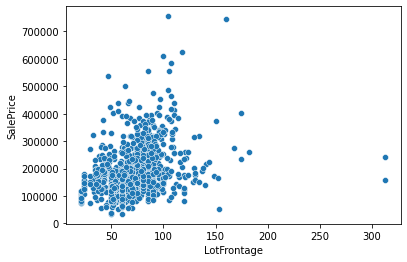

In [4]:

plot = sns.scatterplot(x=train_df['LotFrontage'],y=train_df['SalePrice'])


In [5]:
alldata_df = pd.concat([train_df,test_df], axis=0).reset_index(drop=True)

alldata_df.shape


(2919, 81)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

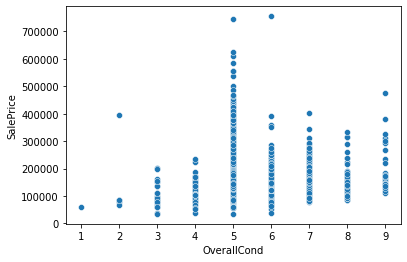

In [6]:
sns.scatterplot(x=train_df['OverallCond'],y=train_df['SalePrice'])

In [7]:
alldata_df.iloc[1458:1462,]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500.0
1460,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1461,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN


In [8]:
alldata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [9]:
alldata_df.iloc[0:5,0:20]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

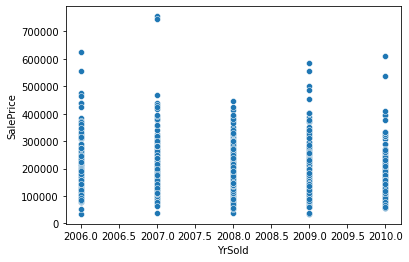

In [10]:
sns.scatterplot(x=train_df['YrSold'],y=train_df['SalePrice'])

In [11]:
alldata_df['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

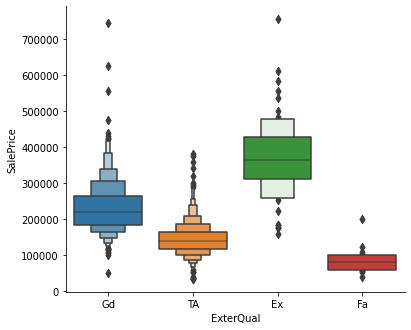

In [12]:
sns.catplot(x="ExterQual", y="SalePrice",kind="boxen", data=train_df, height=4.5, aspect=1.25)

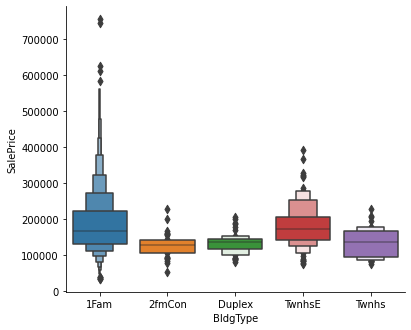

In [13]:

grid = sns.catplot(x="BldgType", y="SalePrice",kind="boxen", data=train_df, height=4.5, aspect=1.25)

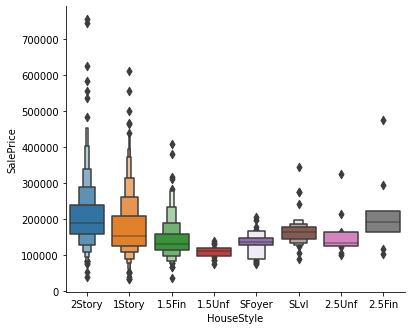

In [14]:
grid = sns.catplot(x="HouseStyle", y="SalePrice",kind="boxen", data=train_df, height=4.5, aspect=1.25)

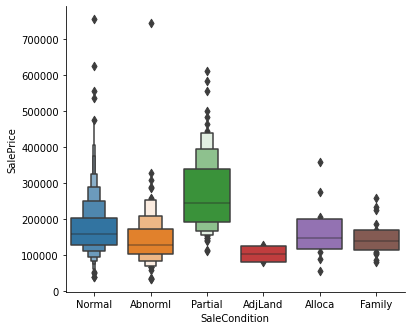

In [15]:
grid = sns.catplot(x="SaleCondition", y="SalePrice",kind="boxen", data=train_df, height=4.5, aspect=1.25)

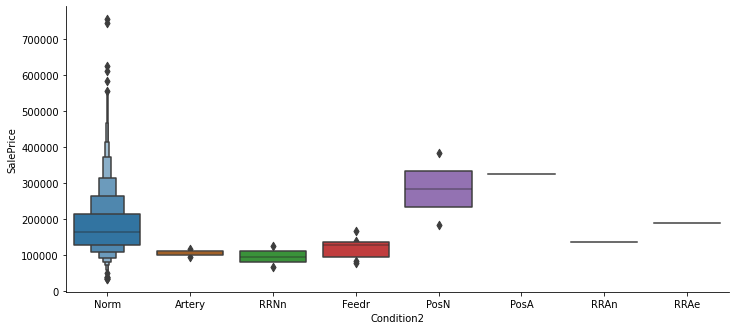

In [16]:
grid = sns.catplot(x="Condition2", y="SalePrice",kind="boxen", data=train_df, height=4.5, aspect=2.25)

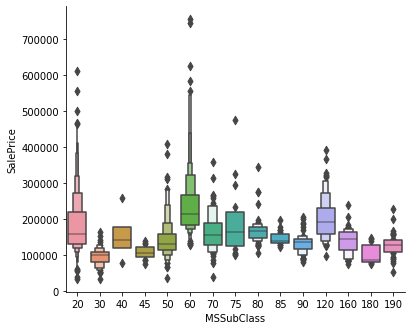

In [17]:
grid = sns.catplot(x="MSSubClass", y="SalePrice",kind="boxen", data=train_df, height=4.5, aspect=1.25)

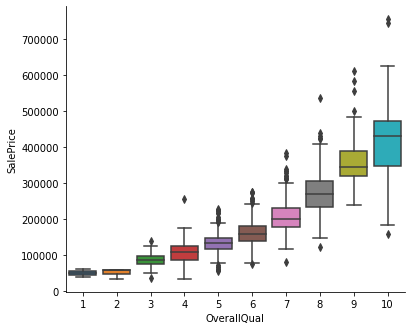

In [18]:
grid = sns.catplot(x="OverallQual", y="SalePrice",kind="box", data=train_df, height=4.5, aspect=1.25)

Visually it looks like "OverallQual" has strong relationship to the target variable ("SalePrice")

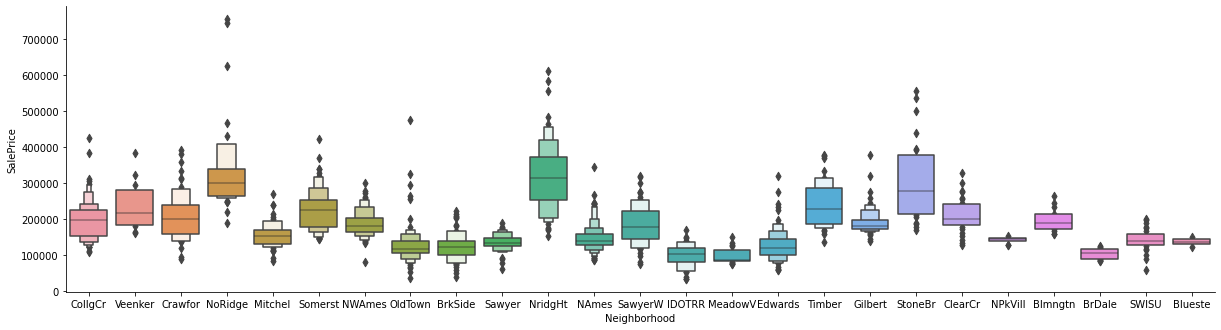

In [19]:

grid = sns.catplot(x="Neighborhood", y="SalePrice",kind="boxen", data=train_df, height=4.5, aspect=3.75)

Also neighborhood seems to have clear relationship to the sale price

### Handle missing data

In [20]:
# Null value handling

alldata_df['MSZoning'].fillna(0, inplace=True)
alldata_df['LotFrontage'].fillna(0, inplace=True)
alldata_df['Alley'].fillna(0, inplace=True)
alldata_df['Utilities'].fillna(0, inplace=True)
alldata_df['Exterior1st'].fillna(0, inplace=True)
alldata_df['Exterior2nd'].fillna(0, inplace=True)
alldata_df['MasVnrType'].fillna(0, inplace=True)
alldata_df['MasVnrArea'].fillna(0, inplace=True)
alldata_df['BsmtQual'].fillna(0, inplace=True)
alldata_df['BsmtCond'].fillna(0, inplace=True)
alldata_df['BsmtExposure'].fillna(0, inplace=True)
alldata_df['BsmtFinType1'].fillna(0, inplace=True)
alldata_df['BsmtFinSF1'].fillna(0, inplace=True)
alldata_df['BsmtFinType2'].fillna(0, inplace=True)
alldata_df['BsmtFinSF2'].fillna(0, inplace=True)
alldata_df['BsmtUnfSF'].fillna(0, inplace=True)
alldata_df['TotalBsmtSF'].fillna(0, inplace=True)
alldata_df['Electrical'].fillna(0, inplace=True)

alldata_df['BsmtFullBath'].fillna(0, inplace=True)
alldata_df['BsmtFullBath'] = alldata_df['BsmtFullBath'].astype(int)
alldata_df['BsmtHalfBath'].fillna(0, inplace=True)
alldata_df['BsmtHalfBath'] = alldata_df['BsmtHalfBath'].astype(int)

alldata_df['KitchenQual'].fillna(0, inplace=True)
alldata_df['Functional'].fillna(0, inplace=True)
alldata_df['FireplaceQu'].fillna(0, inplace=True)
alldata_df['GarageType'].fillna(0, inplace=True)

# Impute nulls from buildyear for this one? Or drop the feature alltogether?
alldata_df['GarageYrBlt'].fillna(0, inplace=True)

alldata_df['GarageFinish'].fillna(0, inplace=True)
alldata_df['GarageCars'].fillna(0, inplace=True)
alldata_df['GarageArea'].fillna(0, inplace=True)
alldata_df['GarageQual'].fillna(0, inplace=True)
alldata_df['GarageCond'].fillna(0, inplace=True)
alldata_df['PoolQC'].fillna(0, inplace=True)
alldata_df['Fence'].fillna(0, inplace=True)
alldata_df['MiscFeature'].fillna(0, inplace=True)

alldata_df['SaleType'].fillna(0, inplace=True)





### Split data to categorical and numeric groups

In [21]:
# Split categorical and continous numeric data

categorical = pd.DataFrame()
continous = pd.DataFrame()

categorical['MSSubClass'] = alldata_df['MSSubClass'].astype(str)
categorical['MSZoning'] = alldata_df['MSZoning'].astype(str)
categorical['Street'] = alldata_df['Street'].astype(str)
categorical['Alley'] = alldata_df['Alley'].astype(str)
categorical['LotShape'] = alldata_df['LotShape'].astype(str)
categorical['LandContour'] = alldata_df['LandContour'].astype(str)
categorical['LotConfig'] = alldata_df['LotConfig'].astype(str)
categorical['LandSlope'] = alldata_df['LandSlope'].astype(str)
categorical['Neighborhood'] = alldata_df['Neighborhood'].astype(str)
categorical['Condition1'] = alldata_df['Condition1'].astype(str)
categorical['Condition2'] = alldata_df['Condition2'].astype(str)
categorical['BldgType'] = alldata_df['BldgType'].astype(str)
categorical['HouseStyle'] = alldata_df['HouseStyle'].astype(str)
categorical['RoofStyle'] = alldata_df['RoofStyle'].astype(str)
categorical['RoofMatl'] = alldata_df['RoofMatl'].astype(str)
categorical['Exterior1st'] = alldata_df['Exterior1st'].astype(str)
categorical['Exterior2nd'] = alldata_df['Exterior2nd'].astype(str)
categorical['MasVnrType'] = alldata_df['MasVnrType'].astype(str)
categorical['ExterQual'] = alldata_df['ExterQual'].astype(str)
categorical['ExterCond'] = alldata_df['ExterCond'].astype(str)
categorical['Foundation'] = alldata_df['Foundation'].astype(str)
categorical['BsmtQual'] = alldata_df['BsmtQual'].astype(str)
categorical['BsmtCond'] = alldata_df['BsmtCond'].astype(str)
categorical['BsmtExposure'] = alldata_df['BsmtExposure'].astype(str)
categorical['BsmtFinType1'] = alldata_df['BsmtFinType1'].astype(str)
categorical['BsmtFinType2'] = alldata_df['BsmtFinType2'].astype(str)
categorical['Heating'] = alldata_df['Heating'].astype(str)
categorical['HeatingQC'] = alldata_df['HeatingQC'].astype(str)
categorical['CentralAir'] = alldata_df['CentralAir'].astype(str)
categorical['Electrical'] = alldata_df['Electrical'].astype(str)
categorical['BsmtFullBath'] = alldata_df['BsmtFullBath'].astype(str)
categorical['BsmtHalfBath'] = alldata_df['BsmtHalfBath'].astype(str)
categorical['FullBath'] = alldata_df['FullBath'].astype(str)
categorical['HalfBath'] = alldata_df['HalfBath'].astype(str)
categorical['KitchenQual'] = alldata_df['KitchenQual'].astype(str)
categorical['Functional'] = alldata_df['Functional'].astype(str)
categorical['FireplaceQu'] = alldata_df['FireplaceQu'].astype(str)
categorical['GarageType'] = alldata_df['GarageType'].astype(str)
categorical['GarageFinish'] = alldata_df['GarageFinish'].astype(str)
categorical['GarageQual'] = alldata_df['GarageQual'].astype(str)
categorical['GarageCond'] = alldata_df['GarageCond'].astype(str)
categorical['PavedDrive'] = alldata_df['PavedDrive'].astype(str)
categorical['PoolQC'] = alldata_df['PoolQC'].astype(str)
categorical['Fence'] = alldata_df['Fence'].astype(str)
#categorical['MiscFeature'] = alldata_df['MiscFeature'].astype(str)
#categorical['MoSold'] = alldata_df['MoSold'].astype(str)
categorical['YrSold'] = alldata_df['YrSold'].astype(str)
categorical['SaleType'] = alldata_df['SaleType'].astype(str)
categorical['SaleCondition'] = alldata_df['SaleCondition'].astype(str)


continous['LotFrontage'] = alldata_df['LotFrontage']
continous['LotArea'] = alldata_df['LotArea']
# Just values 1-10 
continous['OverallQual'] = alldata_df['OverallQual']
# Just values 1-9
continous['OverallCond'] = alldata_df['OverallCond']
continous['YearBuilt'] = alldata_df['YearBuilt']
continous['YearRemodAdd'] = alldata_df['YearRemodAdd']
continous['MasVnrArea'] = alldata_df['MasVnrArea']
continous['BsmtFinSF1'] = alldata_df['BsmtFinSF1']
continous['BsmtFinSF2'] = alldata_df['BsmtFinSF2']
continous['BsmtUnfSF'] = alldata_df['BsmtUnfSF']
continous['TotalBsmtSF'] = alldata_df['TotalBsmtSF']
continous['1stFlrSF'] = alldata_df['1stFlrSF']
continous['2ndFlrSF'] = alldata_df['2ndFlrSF']
continous['LowQualFinSF'] = alldata_df['LowQualFinSF']
continous['GrLivArea'] = alldata_df['GrLivArea']
continous['BedroomAbvGr'] = alldata_df['BedroomAbvGr']
continous['KitchenAbvGr'] = alldata_df['KitchenAbvGr']
continous['TotRmsAbvGrd'] = alldata_df['TotRmsAbvGrd']
continous['Fireplaces'] = alldata_df['Fireplaces']
continous['GarageYrBlt'] = alldata_df['GarageYrBlt']
continous['GarageCars'] = alldata_df['GarageCars']
continous['GarageArea'] = alldata_df['GarageArea']
continous['WoodDeckSF'] = alldata_df['WoodDeckSF']
continous['OpenPorchSF'] = alldata_df['OpenPorchSF']
continous['EnclosedPorch'] = alldata_df['EnclosedPorch']
continous['3SsnPorch'] = alldata_df['3SsnPorch']
continous['ScreenPorch'] = alldata_df['ScreenPorch']
continous['PoolArea'] = alldata_df['PoolArea']
continous['MiscVal'] = alldata_df['MiscVal']



### Feature engineering

In [22]:
#
# Neighborhood
#
neighborhood_saleprice = train_df.groupby(by="Neighborhood")['SalePrice'].mean()

continous['Neighborhood'] = alldata_df['Neighborhood']
continous['NeighborhoodAvgPrice'] = continous.apply(lambda row: neighborhood_saleprice[row.Neighborhood], axis=1 )
#continous.iloc[1458:1462,:]

categorical.drop('Neighborhood',axis=1,inplace=True)
continous.drop('Neighborhood',axis=1,inplace=True)
#categorical.head()



In [23]:

#
# MSSubClass
#
train_df["MSSubClass"] = train_df["MSSubClass"].astype(str)
mssubclass_saleprice = train_df.groupby(by="MSSubClass")['SalePrice'].mean()
mssubclass_saleprice_keys = mssubclass_saleprice.keys()
#mssubclass_saleprice

continous['MSSubClass'] = alldata_df['MSSubClass'].astype(str)
continous['MSSubClassAvgPrice'] = continous.apply(lambda row: mssubclass_saleprice[row.MSSubClass] if row.MSSubClass in mssubclass_saleprice_keys else 150000 , axis=1 )

categorical.drop('MSSubClass',axis=1,inplace=True)
continous.drop('MSSubClass',axis=1,inplace=True)
continous.iloc[1458:1462,:]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,NeighborhoodAvgPrice,MSSubClassAvgPrice
1458,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,0.0,...,240.0,366,0,112,0,0,0,0,145847.08,185224.811567
1459,75.0,9937,5,6,1965,1965,0.0,830.0,290.0,136.0,...,276.0,736,68,0,0,0,0,0,128219.70,185224.811567
1460,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,730.0,140,0,0,0,120,0,0,145847.08,185224.811567
1461,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,312.0,393,36,0,0,0,0,12500,145847.08,185224.811567


In [24]:
#
# HouseStyle
#

#train_df["HouseStyle"]

housestyle_saleprice = train_df.groupby(by="HouseStyle")['SalePrice'].mean()
housestyle_saleprice
housestyle_saleprice_keys = housestyle_saleprice.keys()
#mssubclass_saleprice

continous['HouseStyle'] = alldata_df['HouseStyle'].astype(str)
continous['HouseStyleAvgPrice'] = continous.apply(lambda row: housestyle_saleprice[row.HouseStyle] if row.HouseStyle in housestyle_saleprice_keys else 150000 , axis=1 )

categorical.drop('HouseStyle',axis=1,inplace=True)
continous.drop('HouseStyle',axis=1,inplace=True)
continous.iloc[1458:1462,:]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,NeighborhoodAvgPrice,MSSubClassAvgPrice,HouseStyleAvgPrice
1458,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,0.0,...,366,0,112,0,0,0,0,145847.08,185224.811567,175985.477961
1459,75.0,9937,5,6,1965,1965,0.0,830.0,290.0,136.0,...,736,68,0,0,0,0,0,128219.70,185224.811567,175985.477961
1460,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,140,0,0,0,120,0,0,145847.08,185224.811567,175985.477961
1461,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,145847.08,185224.811567,175985.477961


In [25]:
continous['HouseStyleAvgPrice'].unique()

array([210051.76404494, 175985.47796143, 143116.74025974, 110150.        ,
       135074.48648649, 166703.38461538, 157354.54545455, 220000.        ])

In [26]:
continous.isna().sum().sum()

0

### Fix skewness, kurtosis of numerical data

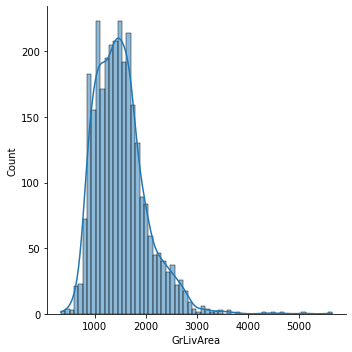

In [27]:
grid = sns.displot(continous, x='GrLivArea', kde=True)

In [28]:
continous['GrLivArea'].skew()

1.2700104075191514

The feature is has positive skewness, fix it with log

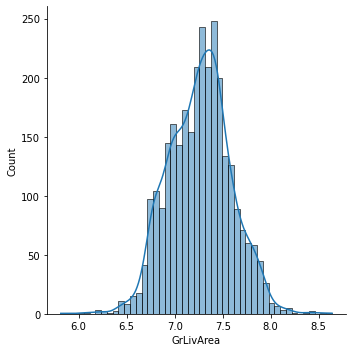

In [29]:
continous['GrLivArea'] = np.log1p(continous['GrLivArea'])

grid = sns.displot(continous, x='GrLivArea', kde=True)

In [30]:
continous['GrLivArea'].skew()

0.013194362973261287

Good enough now

### Scale numerical data

Random forests don't really need scaled data. 

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#continous = continous.values.astype(float)
#continous_normalized = scaler.fit_transform(continous)

continous_normalized_df = pd.DataFrame(scaler.fit_transform(continous), columns=continous.columns, index=continous.index)
#continous_normalized_df
#continous_normalized_df.isna().sum()
#continous
continous_normalized_df.isna().sum()

LotFrontage             0
LotArea                 0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
MasVnrArea              0
BsmtFinSF1              0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF            0
GrLivArea               0
BedroomAbvGr            0
KitchenAbvGr            0
TotRmsAbvGrd            0
Fireplaces              0
GarageYrBlt             0
GarageCars              0
GarageArea              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
3SsnPorch               0
ScreenPorch             0
PoolArea                0
MiscVal                 0
NeighborhoodAvgPrice    0
MSSubClassAvgPrice      0
HouseStyleAvgPrice      0
dtype: int64

### Create one-hot encoding of categorical data

In [33]:

cat_onehot = pd.get_dummies(categorical)
cat_onehot

,MSZoning_0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
2915,0,0,0,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
2916,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
2917,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0


### Let's create train and test sets

In [34]:
train_X = pd.DataFrame()

train_X = cat_onehot.iloc[0:1460,:]

train_X = pd.concat([train_X,continous_normalized_df.iloc[0:1460,:] ], axis=1)
#train_X

train_Y = pd.DataFrame()
train_Y['SalePrice'] = alldata_df.loc[0:1459,'SalePrice']
#train_Y

test_X = pd.DataFrame()
test_X = cat_onehot.iloc[1460:,:]
test_X = pd.concat([test_X,continous_normalized_df.iloc[1460:,:] ], axis=1)
test_X

#test_X.isna().sum()
#test_X.head()

,MSZoning_0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,NeighborhoodAvgPrice,MSSubClassAvgPrice,HouseStyleAvgPrice
1460,0,0,0,1,0,0,0,1,1,0,...,0.365916,-0.702843,-0.359601,-0.103331,1.850256,-0.06315,-0.089592,-0.578121,0.122669,-0.200342
1461,0,0,0,0,1,0,0,1,1,0,...,2.365838,-0.170014,-0.359601,-0.103331,-0.285935,-0.06315,21.944410,-0.578121,0.122669,-0.200342
1462,0,0,0,0,1,0,0,1,1,0,...,0.935064,-0.199616,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,0.218723,1.525641,1.280249
1463,0,0,0,0,1,0,0,1,1,0,...,2.104979,-0.170014,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,0.218723,1.525641,1.280249
1464,0,0,0,0,1,0,0,1,1,0,...,-0.740760,0.510823,-0.359601,-0.103331,2.277494,-0.06315,-0.089592,2.212966,0.521439,-0.200342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,0,0,0,0,1,0,1,1,0,...,-0.740760,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.379425,-1.071455,1.280249
2915,0,0,0,0,0,1,0,1,1,0,...,-0.740760,-0.347624,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.379425,-1.071455,1.280249
2916,0,0,0,0,1,0,0,1,1,0,...,3.006130,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.401435,0.122669,-0.200342
2917,0,0,0,0,1,0,0,1,1,0,...,-0.108374,-0.229217,-0.359601,-0.103331,-0.285935,-0.06315,1.144312,-0.401435,-0.836549,-1.978420


### Train random forest estimator

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor()
rf.fit(train_X, train_Y)




RandomForestRegressor()

### Evaluate estimator results on training data

In [36]:

predictions = rf.predict(train_X)
predictions
#train_Y

# training error, RMSE
train_error = mean_squared_error(train_Y, predictions, squared=False)
print("train error {}".format(train_error))

# train error 14351.166345402386
# 5_random_forest_1.csv: train error 10808.96864632064
# train error 10331.934445243241


train error 10505.93359242836


### Hyperparameter value search using grid search

In [30]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rf,parameters,cv=5)
cv.fit(train_X,train_Y)

#print("cv" + str(cv))

display(cv)

Best parameters are: {'max_depth': 16, 'n_estimators': 50}


0.631 + or -0.02 for the {'max_depth': 2, 'n_estimators': 5}
0.64 + or -0.02 for the {'max_depth': 2, 'n_estimators': 10}
0.659 + or -0.005 for the {'max_depth': 2, 'n_estimators': 50}
0.663 + or -0.008 for the {'max_depth': 2, 'n_estimators': 100}
0.666 + or -0.008 for the {'max_depth': 2, 'n_estimators': 250}
0.666 + or -0.008 for the {'max_depth': 2, 'n_estimators': 500}
0.77 + or -0.025 for the {'max_depth': 4, 'n_estimators': 5}
0.781 + or -0.014 for the {'max_depth': 4, 'n_estimators': 10}
0.795 + or -0.017 for the {'max_depth': 4, 'n_estimators': 50}
0.797 + or -0.018 for the {'max_depth': 4, 'n_estimators': 100}
0.797 + or -0.018 for the {'max_depth': 4, 'n_estimators': 250}
0.797 + or -0.017 for the {'max_depth': 4, 'n_estimators': 500}
0.814 + or -0.032 for the {'max_depth': 8, 'n_estimators': 5}
0.833 + or -0.028 for the {'max_depth': 8, 'n_estimators': 10}
0.849 + or -0.019 for the {'max_depth': 8, 'n_estimators':

Ignore suggested hyperparameter values anyway :)

In [37]:
rf = RandomForestRegressor(n_estimators = 160, random_state = 1, max_depth=30)
rf.fit(train_X, train_Y)

predictions = rf.predict(train_X)
predictions
#train_Y

# training error, RMSE
train_error = mean_squared_error(train_Y, predictions, squared=False)
print("train error {}".format(train_error))

train error 10329.74925137828


### Plot feature importance from the trained model

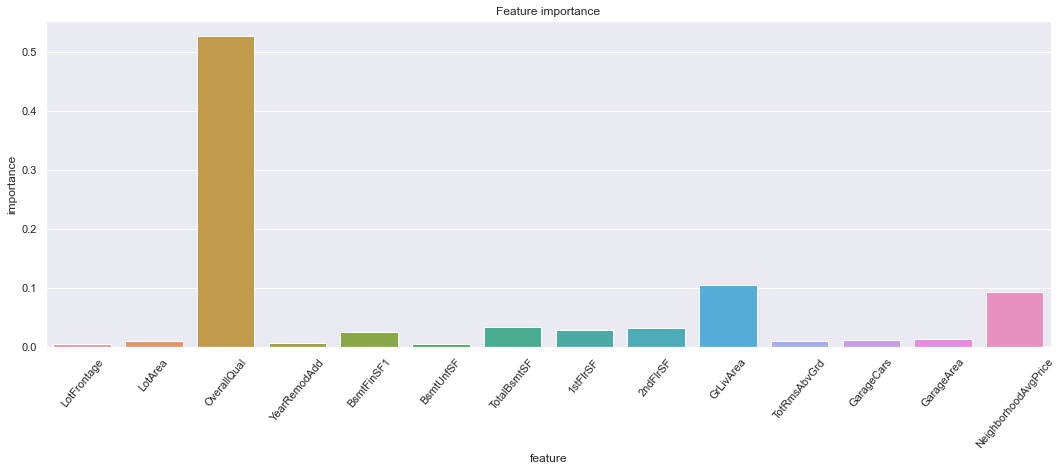

In [38]:

feat_importance_df = pd.DataFrame()
feat_importance_df['feature'] = train_X.columns.to_list()
feat_importance_df['importance'] = rf.feature_importances_.tolist()

feat_importance_df[feat_importance_df['importance'] > 0.005]

most_important = feat_importance_df[feat_importance_df['importance'] > 0.005]

sns.set(rc={'figure.figsize':(18,6)})
sns.barplot( data=most_important, x="feature", y = "importance" ,ci = None)
plt.xticks(rotation=50)
text = plt.title("Feature importance")


### Create submission file out of model predictions (predicted values on test data)

In [39]:
#pd.set_option('display.max_rows', 25)
test_X.isna().sum().sum()

0

In [40]:
#test_X.isnull().sum().sum()
predictions = rf.predict(test_X)
#predictions
submit = pd.DataFrame()
submit['Id'] = test_df['Id']
submit['SalePrice'] = predictions
submit.to_csv("submissions/random_forest_baseline.csv", index=False)
